<a href="https://colab.research.google.com/github/linhgiangpham99/TPPQ1/blob/main/Copie_de_TP_PQ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from numpy import linalg
from math import sin, pi, sqrt, exp
from scipy.special import airy

In [2]:
def kronecker(n,m): #function defines Kronecker symbol
  if n==m:
    return 1
  else:
    return 0
def v_x (x, alpha):
  return alpha*x

def function1(x,n,m,R,alpha):
  return sin(n*pi*x)*sin(m*pi*x)*v_x(x,alpha)

def hamilnorm(n,m,R,alpha):
  return n**2*kronecker(n,m)+2*integrate.quad(function1,0,1,args=(n,m,R,alpha))[0]
def Hamiltonien(N,R,alpha):
  P=np.zeros((N,N))
  for i in range (N):
    for j in range (N):
      P[i,j]=hamilnorm(i+1,j+1,R,alpha) #normalisée
  return P


In [3]:
R=24
N=50
alpha=300 #alpha normalisée

In [4]:
H=Hamiltonien(N,R,alpha)


In [5]:
H1=Hamiltonien(N,R,alpha) #arrondir à 0 pour les valeurs négligeables
for i in range(N):
  for j in range (N):
    if H1[i,j] <(10e-6):
      H1[i,j]=0


In [6]:
print(H1)

[[ 151.    0.    0. ...    0.    0.    0.]
 [   0.  154.    0. ...    0.    0.    0.]
 [   0.    0.  159. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 2454.    0.    0.]
 [   0.    0.    0. ...    0. 2551.    0.]
 [   0.    0.    0. ...    0.    0. 2650.]]


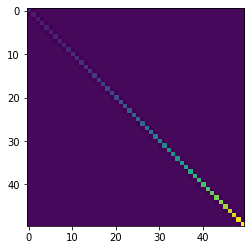

In [7]:
plt.imshow(H)

In [7]:
def energynorm(R,N,alpha): #energie normalisée
  P=Hamiltonien(N,R,alpha)
  k=np.size(P,0)
  Unsorted=np.linalg.eig(P)[0]
  C=sorted(Unsorted)
  #C=Unsorted
  Indexes=list()
  for i in range (N):
    #Indexes.append(C.index(Unsorted[i])) 
    Indexes.append(Unsorted.tolist().index(C[i]))
  K=np.linalg.eig(P)[1]
  return C,K, Indexes
def energy(R,k): 
  energylist=list()
  for i in range (k):
    energylist.append(R*(i-1/2))
  return energylist
def energyquad(R,N,alpha):
  P=Hamiltonien(N,R,alpha)
  energylist=list()
  def funcquad(n,C):
    return  n**2+C
  popt,pcov=curve_fit(funcquad, [i for i in range(1,np.size(P,0)+1)], energynorm(R,N,alpha)[0][0:np.size(P,0)+1])
  for i in range (N):
    energylist.append((i)**2+popt)
  return energylist

[-12.0, 12.0, 36.0, 60.0, 84.0, 108.0, 132.0, 156.0, 180.0, 204.0, 228.0, 252.0, 276.0, 300.0, 324.0, 348.0, 372.0, 396.0, 420.0, 444.0, 468.0, 492.0, 516.0, 540.0, 564.0, 588.0, 612.0, 636.0, 660.0, 684.0, 708.0, 732.0, 756.0, 780.0, 804.0, 828.0, 852.0, 876.0, 900.0, 924.0, 948.0, 972.0, 996.0, 1020.0, 1044.0, 1068.0, 1092.0, 1116.0, 1140.0, 1164.0]


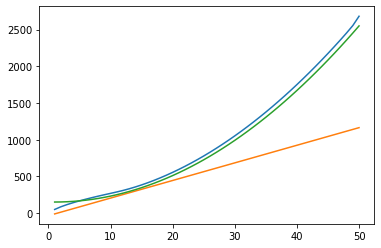

In [9]:
C,K,D= energynorm(R,N,alpha)
#print(C)
plt.plot([i for i in range(1,N+1)],C)
E=energy(R,N)
print(E)
plt.plot([i for i in range(1,N+1)],E)
F=energyquad(R,N,alpha)
plt.plot([i for i in range(1,N+1)],F)


In [8]:
def prodscar(A,B): #produit scalaire
  p=0
  n=np.size(A)
  #print(n)
  for i in range (n):
    p+=A[i]*B[i]
  return p

In [9]:
def vectorprop(R,N,a,k,alpha): #extraire le vecteur propre pour un k distinct
  indexes= energynorm(R,N,alpha)[2]
  n=indexes[k]
  vectorlist_k=list()
  vectorprop1=energynorm(R,N,alpha)[1]
  for i in range(N):
    vectorlist_k.append(vectorprop1[i,n])
  #vectorlist_k.append(vectorprop1[:,n])
  #print(np.shape(vectorlist_k),vectorlist_k)
  return vectorlist_k


In [12]:
#def fonctionprop(x,n): #fonction phi_n espace dual x
 # return np.sqrt(2)*np.sin(n*np.pi*x)
def foncOH(x,R,k,a=1):
  if k==0: 
    return exp((-(pi**2)/4)*R*((x/a-1/2)**2))*((pi)/(2*a**2)*R)**(1/4)
  if k==1:
    return exp((-(pi**2)/4)*R*((x/a-1/2)**2))*((pi**5)/(2*a**2)*R**3)**(1/4)*(x/a-1/2)
  if k==2:
    return exp((-(pi**2)/4)*R*((x/a-1/2)**2))*(pi**2*R*((x/a-1/2)**2)-1)*((pi)/(8*a**2)*R)**(1/4)
def vectorfoncOH(R,k,step,a=1):
  t1 = np.linspace(0, a, step)
  Y = [foncOH(x,R,a,k) for x in t1]
  return Y
def bra(x,N): # vecteur de la fonction d'onde
  L=np.zeros(N)
  for i in range(N):
    #L[i]=(fonctionprop(x,(i+1))) #i+1?
    L[i]=sqrt(2)*sin((i+1)*pi*x)
  return L
def Psi(R,N,step,alpha,k=0,a=1): #k=> choisi n=0,1,2.... # create all the states of the ondular function of a certain level of energy (k)
  vectorproplist=vectorprop(R,N,a,k,alpha)
  vectorlist=np.zeros(step)
  t1 = np.linspace(0, a, step)
  for j in range (step):
    vectorlist[j]= prodscar(vectorproplist,bra(t1[j],N))
  return vectorlist




In [11]:
c=vectorprop(R,N,1,2,alpha)
e=energynorm(R,N,alpha)[0]
#print(np.matmul(H,c),np.multiply(e[2],c))

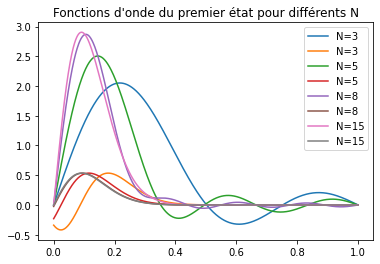

In [36]:
#plot all the Ns and compared with the analyzed function in the topic
a=1
N=[3,5,8,15]
LabelS=["N=3","N=5","N=8","N=15"]
step= 1000
R=24
k=3 #3 niveaux d'énergie
#fig,axs=plt.subplots(1,(k))
i=0
for j in range (len(N)):
  vector=Psi(R,N[j],step,alpha,i)
  t1 = np.linspace(0, a, step)
  plt.plot(t1, vector, label=LabelS[j])
  #eplist= energynorm(R,N[j],alpha)[0]
  #ep=eplist[0]
  #t1 = np.linspace(0, a, step)
  #ai, aip, bi, bip = airy(defznorm(t1,v0,ep))
  #plt.plot(t1,ai,label=LabelS[j])
plt.title("Fonctions d'onde du premier état pour différents N")
plt.legend(loc = 'upper right')
plt.show()
  #for i in range(k):
    #vector=Psi(R,N[j],a,step,alpha,i)
    #t1 = np.linspace(0, a, step)
    #lt.plot(t1, vector, label=LabelS[j])
    #axs[i].plot(t1, vector, label=LabelS[j])
    #K= [foncOH(x,R,a,i) for x in t1]
    #print(i,np.shape(vectorfoncOH(R,a,i,step)))
    #axs[i].plot(t1, K)


In [55]:
def defznorm (x, v0, ep, a=1):
  return (pi**2*v0)**(1/3)* (x/a-ep/v0)
def airyz(x,v0,ep,C,step=1000,a=1):
  return C*airy(defznorm(x,v0,ep))[0]

In [49]:
print(airyz(1,300,151))

None


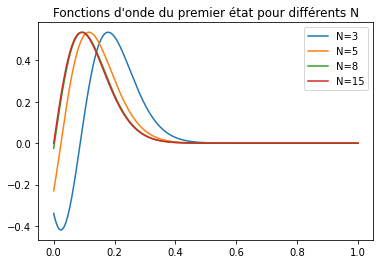

In [52]:
step= 1000
v0=alpha
a=1
for j in range (len(N)):
  eplist= energynorm(R,N[j],alpha)[0]
  ep=eplist[0]
  t1 = np.linspace(0, a, step)
  ai= airyz(t1,v0,ep)
  #print(ai)
  plt.plot(t1,ai,label=LabelS[j])
plt.title("Fonctions d'onde du premier état pour différents N")
plt.legend(loc = 'upper right')
plt.show()



In [69]:
M=15
stepfixed=1000
alphafixed=300
popt,pcov=curve_fit(lambda x,C: airyz(x,v0,ep,C), t1, Psi(R,M,step,alpha) )
print(popt)
K=popt[0]
print(K)

[5.40404169]
5.404041692107789


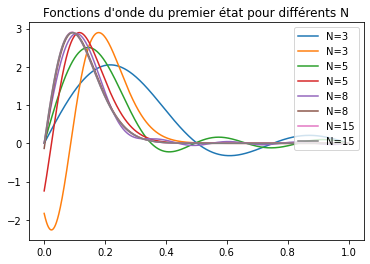

In [70]:
for j in range (len(N)):
  vector=Psi(R,N[j],step,alpha,i)
  t1 = np.linspace(0, a, step)
  plt.plot(t1, vector, label=LabelS[j])
  eplist= energynorm(R,N[j],alpha)[0]
  ep=eplist[0]
  t1 = np.linspace(0, a, step)
  ai= airyz(t1,v0,ep,K)
  plt.plot(t1,ai,label=LabelS[j])
plt.title("Fonctions d'onde du premier état pour différents N")
plt.legend(loc = 'upper right')
plt.show()

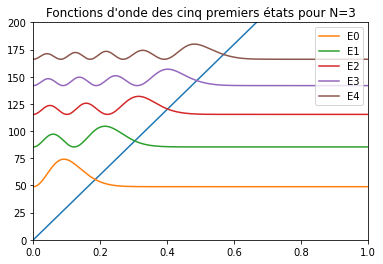

In [103]:
plt.plot(t1,alpha*t1)
N=15
labelE=['E0','E1','E2','E3','E4']
eplist= energynorm(R,N,alpha)[0]
A=3
for i in range(5):
  ep=eplist[i]
  vector=A*abs((Psi(R,N,step,alpha,i))**2)+ep
  t1 = np.linspace(0, a, step)
  plt.plot(t1, vector, label=labelE[i])
plt.title("Fonctions d'onde des cinq premiers états pour N=3")
plt.legend(loc = 'upper right')
plt.axis([0,1,0,200])
plt.show()